In [19]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import data_utils

param_dict: {'epochs': [200], 'batch_size': [200], 'save_every': [5], 'learning_rate': [0.001], 'test_size': [0.2], 'seed': [398], 'hidden_size': [10], 'bias': [True], 'dropout_rate': [0.1], 'ode_nn': [((50, 'tanh'), (50, 'tanh'))], 'readout_nn': [((50, 'tanh'), (50, 'tanh'))], 'enc_nn': [((50, 'tanh'), (50, 'tanh'))], 'use_rnn': [False], 'func_appl_X': [[]], 'solver': ['euler'], 'weight': [0.5], 'weight_decay': [1.0], 'dataset': ['BlackScholes', 'Heston', 'OrnsteinUhlenbeck'], 'dataset_id': [None], 'plot': [True], 'evaluate': [True], 'paths_to_plot': [(0, 1, 2, 3, 4)]}
param_dict: {'epochs': [100], 'batch_size': [20], 'save_every': [10], 'learning_rate': [0.001], 'test_size': [0.2], 'training_size': [200, 400, 800, 1600, 3200, 6400, 12800], 'seed': [398], 'hidden_size': [10], 'bias': [True], 'dropout_rate': [0.1], 'ode_nn': [((10, 'tanh'), (10, 'tanh'))], 'readout_nn': [((10, 'tanh'), (10, 'tanh'))], 'enc_nn': [((10, 'tanh'), (10, 'tanh'))], 'use_rnn': [False], 'func_appl_X': [[]], 's

In [ ]:
import NJODE.train as train
vol_dataset_dic = {
    'volatility': np.array([0.3]).tolist(),
    'drift': np.array([0.5]).tolist(),
    'nb_paths': 1000,
    'nb_steps': 100,
    'S0': np.array([2]).tolist(),
    'maturity': 1.0,
    'dimension': 1,
    'obs_perc': 1.0,
    'scheme': 'euler',
    'model_name': 'BlackScholesForZ',
    'dt': 0.01}
datasetpath, dataset_id = data_utils.create_dataset("BlackScholesForZ",vol_dataset_dic)
train.train(dataset="BlackScholesForZ", dataset_id=dataset_id, use_cond_exp=False, eval_use_true_paths=True, plot=True,  which_loss = 'easy_vol')

In [25]:
dataset_dic = {
    'volatility': 0.3,
    'drift': 2,
    'nb_paths': 10000,
    'nb_steps': 100,
    'S0': 1,
    'maturity': 1.0,
    'dimension': 1,
    'obs_perc': 1.0,
    'scheme': 'euler',
    'model_name': 'BlackScholes',
    'dt': 0.01
}

In [10]:
mu_dataset_dic = {
    'volatility': 0.3,
    'drift': 0.5,
    'nb_paths': 1000,
    'nb_steps': 100,
    'S0': 1,
    'maturity': 1.0,
    'dimension': 1,
    'obs_perc': 1.0,
    'scheme': 'euler',
    'model_name': 'BlackScholes',
    'dt': 0.01
}
datasetpath_mu, dataset_id_mu = data_utils.create_dataset("BlackScholes",mu_dataset_dic)

In [ ]:
train.train(dataset="BlackScholes", dataset_id=dataset_id_mu, use_cond_exp=True,plot=True, which_loss ='easy')

In [20]:
params_dict_mu = {
    'input_size': 1,
    'hidden_size': 10,
    'output_size': 1,
    'ode_nn': ((50, "tanh"), (50, "tanh")),
    'readout_nn': ((50, "tanh"), (50, "tanh")),
    'enc_nn': ((50, "tanh"), (50, "tanh")),
    'use_rnn': False,
    'options': {'which_loss': 'easy'},
    "input_coords": np.arange(1),
    "output_coords": np.arange(1),
    "signature_coords": np.arange(1)
}
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
from models import get_ckpt_model, NJODE
mu_model = NJODE(**params_dict_mu).to(device)
optimizer = torch.optim.Adam(mu_model.parameters())
get_ckpt_model("../data/saved_models/id-68/best_checkpoint/", mu_model, optimizer, device)
mu_model.eval()

using loss: easy
neuralODE use input scaling with tanh
use residual network: input_size=1, output_size=10
use residual network: input_size=10, output_size=1


NJODE(
  (ode_f): ODEFunc(
    (f): Sequential(
      (0): Linear(in_features=13, out_features=50, bias=True)
      (1): Tanh()
      (2): Dropout(p=0, inplace=False)
      (3): Linear(in_features=50, out_features=50, bias=True)
      (4): Tanh()
      (5): Dropout(p=0, inplace=False)
      (6): Linear(in_features=50, out_features=10, bias=True)
    )
  )
  (encoder_map): FFNN(
    (ffnn): Sequential(
      (0): Linear(in_features=1, out_features=50, bias=True)
      (1): Tanh()
      (2): Dropout(p=0, inplace=False)
      (3): Linear(in_features=50, out_features=50, bias=True)
      (4): Tanh()
      (5): Dropout(p=0, inplace=False)
      (6): Linear(in_features=50, out_features=10, bias=True)
    )
  )
  (readout_map): FFNN(
    (ffnn): Sequential(
      (0): Linear(in_features=10, out_features=50, bias=True)
      (1): Tanh()
      (2): Dropout(p=0, inplace=False)
      (3): Linear(in_features=50, out_features=50, bias=True)
      (4): Tanh()
      (5): Dropout(p=0, inplace=False)
 

In [21]:
params_dict_vol = {
    'input_size': 1,
    'hidden_size': 10,
    'output_size': 1,
    'ode_nn': ((50, "tanh"), (50, "tanh")),
    'readout_nn': ((50, "tanh"), (50, "tanh")),
    'enc_nn': ((50, "tanh"), (50, "tanh")),
    'use_rnn': False,
    'options': {'which_loss': 'easy_vol'},
    "input_coords": np.arange(1),
    "output_coords": np.arange(1),
    "signature_coords": np.arange(1)
}
vol_model = NJODE(**params_dict_vol).to(device)
optimizer_vol = torch.optim.Adam(vol_model.parameters())
get_ckpt_model("../data/saved_models/id-67/best_checkpoint/", vol_model, optimizer_vol, device)
vol_model.eval()

using loss: easy_vol
neuralODE use input scaling with tanh
use residual network: input_size=1, output_size=10
use residual network: input_size=10, output_size=1


NJODE(
  (ode_f): ODEFunc(
    (f): Sequential(
      (0): Linear(in_features=13, out_features=50, bias=True)
      (1): Tanh()
      (2): Dropout(p=0, inplace=False)
      (3): Linear(in_features=50, out_features=50, bias=True)
      (4): Tanh()
      (5): Dropout(p=0, inplace=False)
      (6): Linear(in_features=50, out_features=10, bias=True)
    )
  )
  (encoder_map): FFNN(
    (ffnn): Sequential(
      (0): Linear(in_features=1, out_features=50, bias=True)
      (1): Tanh()
      (2): Dropout(p=0, inplace=False)
      (3): Linear(in_features=50, out_features=50, bias=True)
      (4): Tanh()
      (5): Dropout(p=0, inplace=False)
      (6): Linear(in_features=50, out_features=10, bias=True)
    )
  )
  (readout_map): FFNN(
    (ffnn): Sequential(
      (0): Linear(in_features=10, out_features=50, bias=True)
      (1): Tanh()
      (2): Dropout(p=0, inplace=False)
      (3): Linear(in_features=50, out_features=50, bias=True)
      (4): Tanh()
      (5): Dropout(p=0, inplace=False)
 

In [22]:
 def generate_next_value( X_t, mu_t, sigma_t, delta_t):
    """
    Generate the next value in the time series using the Euler-Maruyama scheme.

    :param X_t: current value tensor of shape (batch_size, d)
    :param mu_t: drift coefficient tensor of shape (batch_size, d)
    :param sigma_t: diffusion coefficient tensor of shape ( d, d)
    :param delta_t: time difference float
    :return: next value tensor of shape (batch_size, d)
    """
    delta_Wt = torch.randn_like(X_t) * np.sqrt(delta_t)

    X_t_next = X_t + mu_t * delta_t + delta_Wt @ sigma_t

    return X_t_next

In [23]:
paths = []
for j in range(1):
    times=np.array([])
    time_ptr = np.array([0])
    obs_idx = torch.tensor([],dtype=torch.long)
    start_Z = torch.tensor(np.zeros((1,)), dtype=torch.float).unsqueeze(0)
    Z = torch.tensor([], dtype=torch.float)
    delta_t=0.01
    X= torch.tensor([], dtype=torch.float)
    start_X = torch.tensor([1.0], dtype=torch.float).unsqueeze(0)
    n_obs_ot=torch.tensor([0], dtype=torch.float)
    d=1
    first_term = torch.tensor([], dtype=torch.float)
    second_term = torch.tensor([], dtype=torch.float)
    third_term = torch.tensor([], dtype=torch.float)
    
    
    X_cond_true = torch.tensor([], dtype=torch.float)
    X_cond_model = torch.tensor([], dtype=torch.float)
    X_cond = torch.tensor([], dtype=torch.float)
    for i in range(1, 101):
          
        T=delta_t*i
        mu_pred=mu_model.get_pred(times, time_ptr, X, obs_idx, delta_t, T, start_X, n_obs_ot)["pred"][-1]
        X_cond_model = torch.cat((X_cond_model, mu_pred))
        #print(start_X, X, mu_model.get_pred(times, time_ptr, X, obs_idx, delta_t, T, start_X, n_obs_ot))
       
        if i==1:
            X_t=start_X
        elif i==2:
            X_t = X[i-2,:].unsqueeze(0)
            X_t_minus = start_X
            Z_tensor = (X_t - X_t_minus).T@(X_t-X_t_minus)
            Z=torch.cat((Z,Z_tensor.view(1,-1)))
        else:
            X_t = X[i-2,:].unsqueeze(0)
            X_t_minus = X[i-3, :].unsqueeze(0)
            Z_tensor = (X_t - X_t_minus).T@(X_t-X_t_minus)
            Z=torch.cat((Z,Z_tensor.view(1,-1)))
    
        """
        X_t = X[i-1,:].unsqueeze(0)
        if i>1:
            X_t_minus = X[i-2, :].unsqueeze(0)
            Z_tensor = (X_t - X_t_minus).T@(X_t-X_t_minus)
            Z=torch.cat((Z,Z_tensor.view(1,-1))) 
        """
    
        #print(Z)

        X_cond_true = torch.cat((X_cond_true, torch.tensor(stockmodel.next_cond_exp(X_t.detach().numpy(),delta_t,T), dtype=torch.float)))
        X_cond = torch.cat((X_cond,next_cond_exp(X_t, delta_t, 2)))
        sigma_pred=vol_model.get_pred(times, time_ptr, Z, obs_idx, delta_t, T, start_Z, n_obs_ot )["pred"][-1]
        #print(vol_model.get_pred(times, time_ptr, Z, obs_idx, delta_t, T, start_Z, n_obs_ot ))
        mu_hat_t = (mu_pred - X_t)/delta_t
        sigma_hat_t = sigma_pred.view(d,d)/np.sqrt(delta_t)
        
        X_next = generate_next_value(X_t, mu_hat_t, sigma_hat_t, delta_t)

        X= torch.cat((X, X_next))
        times=np.append(times, delta_t*i)
        time_ptr = np.append(time_ptr, i)
        obs_idx=torch.cat((obs_idx, torch.tensor([0], dtype=torch.long)))
        n_obs_ot+=1 
        
    X_new = torch.cat((torch.tensor([1.0]).unsqueeze(0), X), dim=0)    
    paths.append(X_new)
generated_paths=torch.stack(paths)

In [6]:
def next_cond_exp( y, delta_t, drift):
    return y * np.exp(drift * delta_t)

In [9]:
times=np.array([])
time_ptr = np.array([0])
obs_idx = torch.tensor([],dtype=torch.long)
start_Z = torch.tensor(np.zeros((1,)), dtype=torch.float).unsqueeze(0)
Z = torch.tensor([], dtype=torch.float)
delta_t=0.01
X= torch.tensor([], dtype=torch.float)
start_X = torch.tensor([1.0], dtype=torch.float).unsqueeze(0)
n_obs_ot=torch.tensor([0], dtype=torch.float)


first_term = torch.tensor([], dtype=torch.float)
second_term = torch.tensor([], dtype=torch.float)
third_term = torch.tensor([], dtype=torch.float)


X_cond_true = torch.tensor([], dtype=torch.float)
X_cond_model = torch.tensor([], dtype=torch.float)
X_cond = torch.tensor([], dtype=torch.float)


for i in range(1, 101):
    T=delta_t*i
    mu_pred=mu_model.get_pred(times, time_ptr, X, obs_idx, delta_t, T, start_X, n_obs_ot)["pred"][-1]
    #print(X,mu_model.get_pred(times, time_ptr, X, obs_idx, delta_t, T, start_X, n_obs_ot)["pred"])
    X_cond_model = torch.cat((X_cond_model, mu_pred))

    #print(model_mu.get_pred(times, time_ptr, X, obs_idx, delta_t, T, start_X, n_obs_ot))

    
    if i==1:
        X_t=start_X
    elif i==2:
        X_t = X[i-2,:].unsqueeze(0)
        X_t_minus = start_X
        Z_tensor = (X_t - X_t_minus).T@(X_t-X_t_minus)
        Z=torch.cat((Z,Z_tensor.view(1,-1)))
    else:
        X_t = X[i-2,:].unsqueeze(0)
        X_t_minus = X[i-3, :].unsqueeze(0)
        Z_tensor = (X_t - X_t_minus).T@(X_t-X_t_minus)
        Z=torch.cat((Z,Z_tensor.view(1,-1)))


    X_cond_true = torch.cat((X_cond_true, torch.tensor(stockmodel.next_cond_exp(X_t.detach().numpy(),delta_t,T), dtype=torch.float)))
    X_cond = torch.cat((X_cond,next_cond_exp(X_t, delta_t, 2)))
    sigma_pred=vol_model.get_pred(times, time_ptr, Z, obs_idx, delta_t, T, start_Z, n_obs_ot )["pred"][-1]

    #print(model_vol.get_pred(times, time_ptr, Z, obs_idx, delta_t, T, start_Z, n_obs_ot ))
    mu_hat_t = (mu_pred - X_t)/delta_t
    sigma_hat_t = sigma_pred.view(1,1)/np.sqrt(delta_t)




    first_term = torch.cat((first_term,X_t))
    second_term = torch.cat((second_term,mu_hat_t*delta_t))
    third_term = torch.cat((third_term,torch.randn_like(X_t)@sigma_hat_t*np.sqrt(delta_t)))
    #X_next = X_t +  mu_hat_t*delta_t + torch.randn_like(X_t)@sigma_hat_t*np.sqrt(delta_t)



    X_next = generate_next_value(X_t, mu_hat_t, sigma_hat_t, delta_t)
    #print(X_next, X_t, mu_hat_t*delta_t,  torch.randn_like(X_t)@sigma_pred.view(3,3))

    X= torch.cat((X, X_next))
    times=np.append(times, delta_t*i)
    time_ptr = np.append(time_ptr, i)
    obs_idx=torch.cat((obs_idx, torch.tensor([0], dtype=torch.long)))
    n_obs_ot+=1

In [16]:
save_path = "../data/figures"

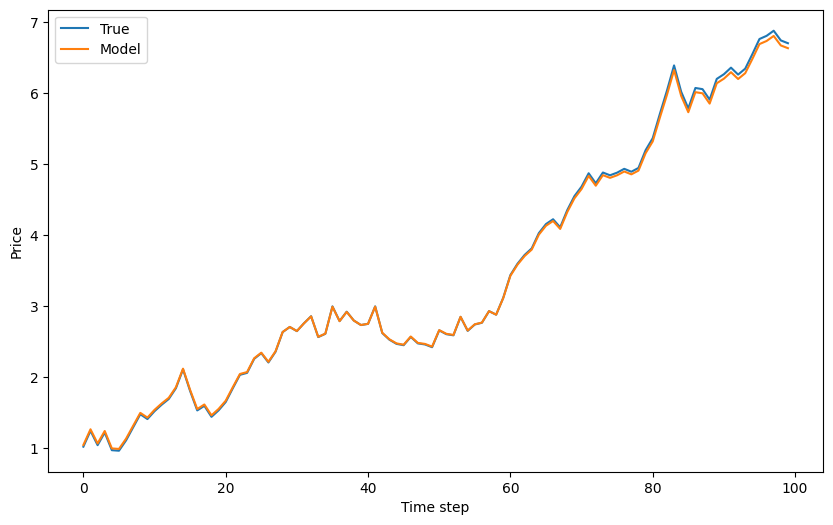

In [17]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(X_cond_true.detach().numpy(), label='True')
ax.plot(X_cond_model.detach().numpy(), label='Model')
ax.set_ylabel("Price")
ax.set_xlabel("Time step")
ax.legend()
fig.savefig(os.path.join(save_path, 'bs_ce.png'))
plt.show()

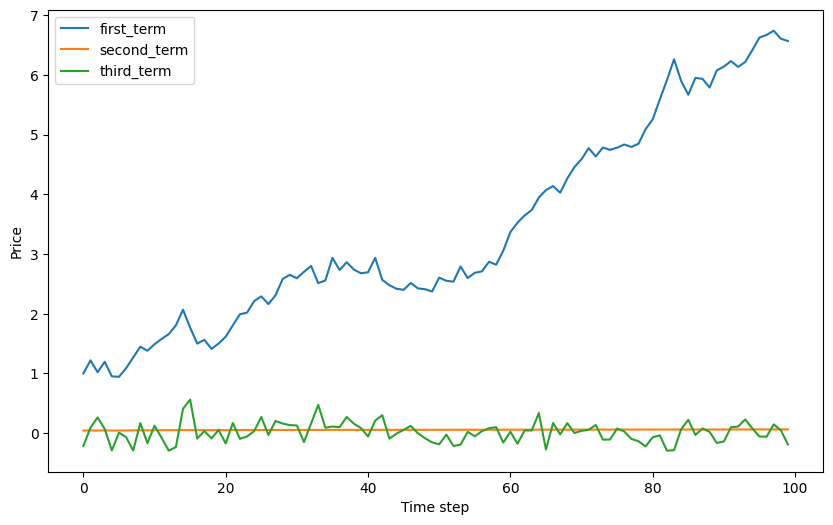

In [18]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(first_term.detach().numpy(), label='first_term')
ax.plot(second_term.detach().numpy(), label='second_term')
ax.plot(third_term.detach().numpy(), label='third_term')
ax.set_ylabel("Price")
ax.set_xlabel("Time step")
ax.legend()
fig.savefig(os.path.join(save_path, 'bs_term.png'))
plt.show()

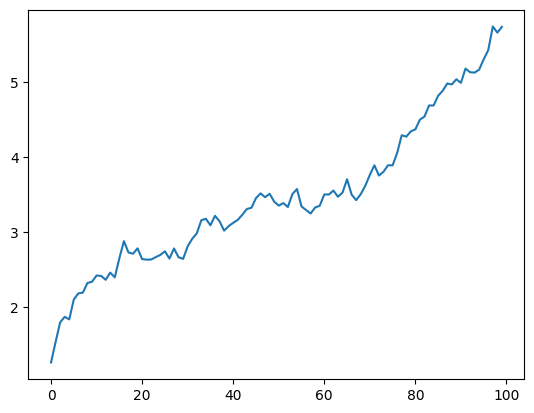

In [70]:
plt.plot(X.detach().numpy())
plt.show()

In [27]:
import data_utils

param_dict: {'epochs': [200], 'batch_size': [200], 'save_every': [5], 'learning_rate': [0.001], 'test_size': [0.2], 'seed': [398], 'hidden_size': [10], 'bias': [True], 'dropout_rate': [0.1], 'ode_nn': [((50, 'tanh'), (50, 'tanh'))], 'readout_nn': [((50, 'tanh'), (50, 'tanh'))], 'enc_nn': [((50, 'tanh'), (50, 'tanh'))], 'use_rnn': [False], 'func_appl_X': [[]], 'solver': ['euler'], 'weight': [0.5], 'weight_decay': [1.0], 'dataset': ['BlackScholes', 'Heston', 'OrnsteinUhlenbeck'], 'dataset_id': [None], 'plot': [True], 'evaluate': [True], 'paths_to_plot': [(0, 1, 2, 3, 4)]}
param_dict: {'epochs': [100], 'batch_size': [20], 'save_every': [10], 'learning_rate': [0.001], 'test_size': [0.2], 'training_size': [200, 400, 800, 1600, 3200, 6400, 12800], 'seed': [398], 'hidden_size': [10], 'bias': [True], 'dropout_rate': [0.1], 'ode_nn': [((10, 'tanh'), (10, 'tanh'))], 'readout_nn': [((10, 'tanh'), (10, 'tanh'))], 'enc_nn': [((10, 'tanh'), (10, 'tanh'))], 'use_rnn': [False], 'func_appl_X': [[]], 's

In [7]:
dataset_metadata = data_utils.load_metadata(stock_model_name="BlackScholes", time_id=77)
stockmodel = data_utils._STOCK_MODELS[dataset_metadata['model_name']](**dataset_metadata)

In [11]:
mu_data=np.load("../data/training_data/BlackScholes-77/data.npy")

In [12]:
mu_data.shape

(10000, 1, 101)

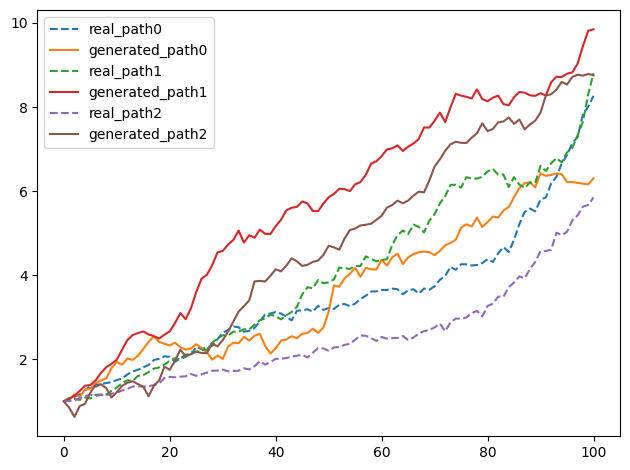

In [9]:
real_path = mu_data[:, 0, :].T
generated_path = generated_paths[:,:, 0].T

for j in range(3):
    plt.plot(real_path[:, j], label=f'real_path{j}', linestyle="--")
    plt.plot(generated_path[:,j].detach().numpy(), label=f'generated_path{j}')

plt.legend()

plt.tight_layout()
plt.show()

In [30]:
import pandas as pd

In [32]:
# Convert to DataFrame for easier manipulation (optional)
price_df = pd.DataFrame(generated_path.detach().numpy())
# Calculate Log Returns
log_returns = np.log(price_df / price_df.shift(1)).dropna()

In [77]:
np.mean(log_returns.std())

0.04255232

In [79]:
drift = log_returns.mean()+(log_returns.std())**2/2

In [80]:
np.mean(drift)

0.0018349744

In [38]:
# Convert to DataFrame for easier manipulation (optional)
price_df_real = pd.DataFrame(real_path)

# Calculate Log Returns
log_returns_real = np.log(price_df_real / price_df_real.shift(1)).dropna()

In [43]:
log_returns_real.mean()

0      0.006320
1      0.006960
2      0.002812
3     -0.001294
4      0.004130
         ...   
995    0.005149
996    0.008986
997    0.001600
998    0.001778
999    0.003200
Length: 1000, dtype: float64

In [75]:
np.mean(log_returns_real.std())

0.02972265020751311

In [78]:
drift_real = log_returns_real.mean()+(log_returns_real.std())**2/2

In [74]:
np.mean(drift_real)

0.005034783771368981

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch

# Compare (visualize) paths
def compare_path(x_real, x_fake, titles=None, file_path=None, return_figax=False, dim=0, plot_size=20):
    fig, ax = plt.subplots(1, 2, figsize=[12, 4], sharex=True, sharey=True)
    ax[0].plot(
        x_real[:plot_size].numpy().T,
        alpha=0.3,
        marker="o",
        linewidth=1,
        markersize=1,
    )
    ax[1].plot(
        x_fake[:plot_size].numpy().T,
        alpha=0.3,
        marker="o",
        linewidth=1,
        markersize=1,
    )
    if titles:
        ax[0].set_title(titles[0])
        ax[1].set_title(titles[1])

    for i in range(2):
        ax[i].set_xlabel("Time")
        ax[i].set_ylabel("Prices")
    if return_figax:
        return fig, ax
    if file_path is None:
        plt.show()
    else:
        plt.savefig(file_path, bbox_inches="tight")
    plt.close()

In [14]:
real_data = torch.tensor(mu_data[:10, 0, :])
fake_data = generated_paths[:, :, 0].detach()

In [15]:
fake_data

tensor([[1.0000, 1.0424, 1.1632,  ..., 6.1775, 6.1595, 6.3062],
        [1.0000, 1.0500, 1.1322,  ..., 9.4506, 9.8137, 9.8480],
        [1.0000, 0.8503, 0.6290,  ..., 8.7476, 8.7883, 8.7539],
        ...,
        [1.0000, 1.0585, 1.3364,  ..., 7.1243, 7.2051, 7.3179],
        [1.0000, 0.9924, 0.9116,  ..., 5.6678, 5.7249, 5.9047],
        [1.0000, 1.1361, 1.2427,  ..., 4.3179, 4.4911, 4.6867]])

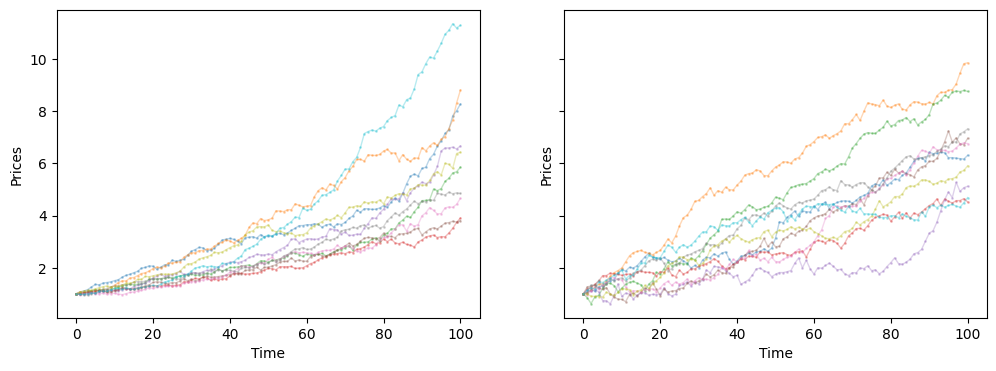

In [16]:
compare_path(real_data,fake_data)

In [17]:
# Compare Marginal
def compare_marginal_hist(real_data, fake_data, n_time_slice=4, file_path=None):
    time_range = np.linspace(11, real_data.shape[1] - 1, n_time_slice, dtype=int)
    n_cols = n_time_slice
    fig, ax = plt.subplots(1, n_cols, figsize=[12, 4], sharey=True, sharex=True)
    bins = np.linspace(0, 5, 50)
    for i in range(n_cols):
        axi = ax.flat[i]
        n = time_range[i]
        axi.hist(real_data[:, n], bins=bins, alpha=0.5, label="real")
        axi.hist(fake_data[:, n], bins=bins, alpha=0.3, label="fake")
        axi.set_title(f"Time: {n}")
        axi.legend()
        # axi.set_xlabel("Marginal prices")
    if file_path is None:
        plt.show()
    else:
        plt.savefig(file_path, bbox_inches="tight")
        plt.close(fig)

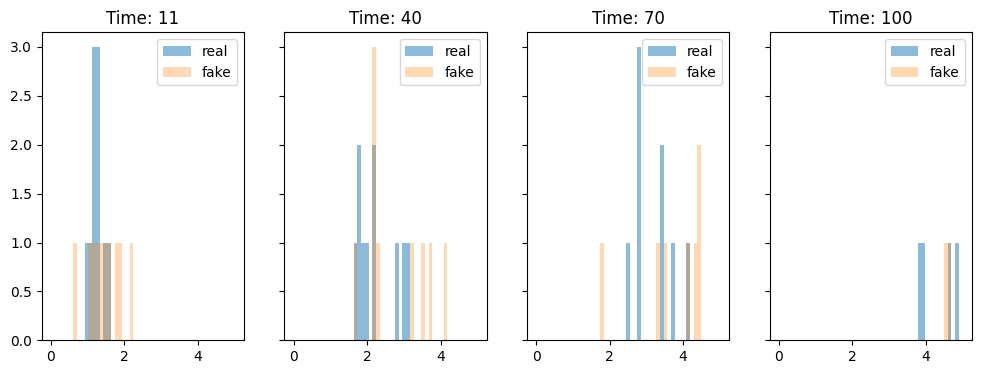

In [18]:
compare_marginal_hist(real_data, fake_data, 4)

In [59]:
real_data

tensor([[2.0000, 2.1158, 2.1518,  ..., 3.6673, 3.6996, 3.7627],
        [2.0000, 2.1230, 2.0478,  ..., 3.5874, 3.8382, 4.0113],
        [2.0000, 1.9878, 1.9835,  ..., 2.6257, 2.6074, 2.6494],
        ...,
        [2.0000, 2.0874, 2.1186,  ..., 2.3249, 2.3623, 2.3471],
        [2.0000, 1.9324, 1.9177,  ..., 2.5647, 2.5496, 2.3892],
        [2.0000, 1.9713, 1.9371,  ..., 2.9381, 2.8499, 2.7542]],
       dtype=torch.float64)

In [63]:
torch.mean(real_data, dim=0).shape

torch.Size([101])

In [19]:
# Compare Drift and Volatility
def prices2returns(prices):
    returns = prices[:, 1:] / prices[:, :-1] - 1
    return returns


def compute_volatility(price_path, T):
    return_path = prices2returns(price_path)
    vol2 = torch.sum(return_path**2, dim=1) / T
    vol = torch.sqrt(vol2)
    return vol


def compute_drift(price_path, T):
    return_path = prices2returns(price_path)
    drift = torch.sum(return_path, dim=1) / T
    return drift


def plot_mean_log_prices(data, data_name, axi):
    data = torch.log(data)
    data_mean = torch.mean(data, dim=0)
    data_std = torch.std(data, dim=0)
    axi.plot(data_mean, marker="o", linewidth=1, markersize=1, label=data_name)
    axi.fill_between(
        torch.arange(len(data_mean)),
        data_mean - data_std,
        data_mean + data_std,
        alpha=0.2,
    )


def compare_drift_volatility(real_data, fake_data, T):
    fig, ax = plt.subplots(1, 2, figsize=[12, 4])

    plot_mean_log_prices(real_data, "real", ax[0])
    plot_mean_log_prices(fake_data, "fake", ax[0])
    ax[0].legend()
    ax[0].set_xlabel("Time")
    ax[0].set_title("Log-prices")

    vol = compute_volatility(real_data, T)
    ax[1].hist(vol, bins=100, alpha=0.4, label="real", density=True)
    # sns.kdeplot(vol,ax = ax[1])
    vol = compute_volatility(fake_data, T)
    ax[1].hist(vol, bins=100, alpha=0.4, label="fake", density=True)
    # sns.kdeplot(vol,ax = ax[1])
    ax[1].legend()
    ax[1].set_title("Volatility")
    ax[1].set_xlabel("Volatility")

    plt.show()

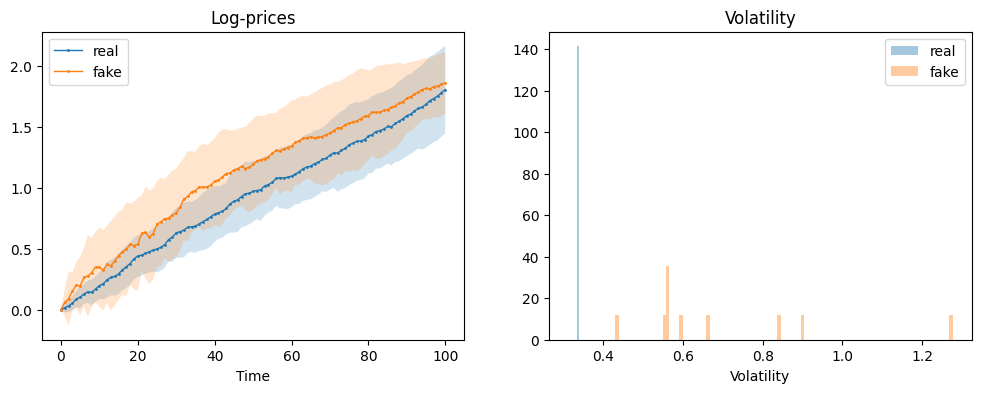

In [20]:
compare_drift_volatility(real_data,fake_data, 1)

In [1]:
from configs import config_generate1 

In [6]:
def f(**kwargs):
    print(kwargs)

In [7]:
f(**config_generate1.mu_param_dict)

{'which_loss': ['easy'], 'dataset': ['BlackScholes'], 'plot': [False], 'paths_to_plot': [(0,)]}
